In [76]:
!pip install -r requirements.txt

  Using cached folium-0.12.1-py2.py3-none-any.whl (94 kB)
  Using cached branca-0.4.2-py3-none-any.whl (24 kB)


In [1]:
import sklearn
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.express as px
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

In [2]:
df_scores= pd.read_csv('clean_data/scores.csv')
df_data = pd.read_csv('clean_data/clean_SSA_2016_2020_School_dbn.csv')
df_type = pd.read_csv('clean_data/more_school_dbn.csv')
cleaning = pd.read_csv('clean_data/cleaning.csv')


In [3]:
df_scores.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.40%,21.80%,67.80%,4.60%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.60%,13.30%,18.00%,38.50%,657.0,601.0,601.0,91.00%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.70%,38.50%,41.30%,5.90%,395.0,411.0,387.0,78.90%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.10%,28.20%,56.90%,8.60%,418.0,428.0,415.0,65.10%


In [4]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    435 non-null    object 
 1   School Name                  435 non-null    object 
 2   Borough                      435 non-null    object 
 3   Building Code                435 non-null    object 
 4   Street Address               435 non-null    object 
 5   City                         435 non-null    object 
 6   State                        435 non-null    object 
 7   Zip Code                     435 non-null    int64  
 8   Latitude                     435 non-null    float64
 9   Longitude                    435 non-null    float64
 10  Phone Number                 435 non-null    object 
 11  Start Time                   431 non-null    object 
 12  End Time                     431 non-null    object 
 13  Student Enrollment  

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42707 entries, 0 to 42706
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   School ID          42454 non-null  object
 1   School Campus      42707 non-null  object
 2   Intervention Type  42707 non-null  object
 3   Scanning Type      42705 non-null  object
 4   School Related     42707 non-null  object
 5   School Hours       42707 non-null  object
 6   Enforcment By      31692 non-null  object
 7   Restraints         42707 non-null  object
 8   Force              42318 non-null  object
 9   Top Charge         4565 non-null   object
 10  SummonsCharge      2895 non-null   object
 11  Classification     12283 non-null  object
 12  Incident Location  42631 non-null  object
 13  Scanning Incident  42624 non-null  object
 14  Greater Than 21    41499 non-null  object
 15  Type Of Force      41197 non-null  object
 16  Year               42707 non-null  int64

In [6]:
df_data.head()

,School ID,School Campus,Intervention Type,Scanning Type,School Related,School Hours,Enforcment By,Restraints,Force,Top Charge,SummonsCharge,Classification,Incident Location,Scanning Incident,Greater Than 21,Type Of Force,Year
0,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,CRIM POS WEAPON,NaN,M,On-Site,Y,NaN,NaN,2016
1,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,ASSAULT,NaN,F,On-Site,N,NaN,NaN,2016
2,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,N,Y,PATROL,Yes,N,CPSP,NaN,M,Off-Site,N,NaN,NaN,2016
3,21K410,Abraham Lincoln HS(BS),Child in Crisis,Full-Time,Y,Y,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
4,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,AGG HARASS,NaN,M,On-Site,N,NaN,NaN,2016


In [7]:
cleaning.head()

,School ID,School Campus,Intervention Type,Scanning Type,School Related,School Hours,Enforcment By,Restraints,Force,Top Charge,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,CRIM POS WEAPON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,ASSAULT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,N,Y,PATROL,Yes,N,CPSP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21K410,Abraham Lincoln HS(BS),Child in Crisis,Full-Time,Y,Y,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,AGG HARASS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
del cleaning['Unnamed: 27']
# del cleaning['Unnamed: 18']
# del cleaning['Unnamed: 19']
# del cleaning['Unnamed: 20']
# del cleaning['Unnamed: 21']
# del cleaning['Unnamed: 22']
# del cleaning['Unnamed: 23']
# del cleaning['Unnamed: 24']
# del cleaning['Unnamed: 25']
# del cleaning['Unnamed: 26']

In [9]:
cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42707 entries, 0 to 42706
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   School ID          42155 non-null  object 
 1   School Campus      42707 non-null  object 
 2   Intervention Type  42707 non-null  object 
 3   Scanning Type      42705 non-null  object 
 4   School Related     42707 non-null  object 
 5   School Hours       42707 non-null  object 
 6   Enforcment By      31692 non-null  object 
 7   Restraints         42707 non-null  object 
 8   Force              42318 non-null  object 
 9   Top Charge         4565 non-null   object 
 10  SummonsCharge      2895 non-null   object 
 11  Classification     12283 non-null  object 
 12  Incident Location  42631 non-null  object 
 13  Scanning Incident  42624 non-null  object 
 14  Greater Than 21    41499 non-null  object 
 15  Type Of Force      41197 non-null  object 
 16  Year               427

In [10]:
df = pd.merge(df_scores, cleaning, on=['School ID']).fillna(0)
df.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15921 entries, 0 to 15920
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    15921 non-null  object 
 1   School Name                  15921 non-null  object 
 2   Borough                      15921 non-null  object 
 3   Building Code                15921 non-null  object 
 4   Street Address               15921 non-null  object 
 5   City                         15921 non-null  object 
 6   State                        15921 non-null  object 
 7   Zip Code                     15921 non-null  int64  
 8   Latitude                     15921 non-null  float64
 9   Longitude                    15921 non-null  float64
 10  Phone Number                 15921 non-null  object 
 11  Start Time                   15921 non-null  object 
 12  End Time                     15921 non-null  object 
 13  Student Enrollme

In [12]:
joined_df = cleaning.join(df_scores.set_index('School ID'), on='School ID', how='left')
joined_df.head()

,School ID,School Campus,Intervention Type,Scanning Type,School Related,School Hours,Enforcment By,Restraints,Force,Top Charge,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,CRIM POS WEAPON,...,3:10 PM,2341.0,20.10%,39.80%,23.70%,15.10%,441.0,422.0,422.0,54.90%
1,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,ASSAULT,...,3:10 PM,2341.0,20.10%,39.80%,23.70%,15.10%,441.0,422.0,422.0,54.90%
2,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,N,Y,PATROL,Yes,N,CPSP,...,3:10 PM,2341.0,20.10%,39.80%,23.70%,15.10%,441.0,422.0,422.0,54.90%
3,21K410,Abraham Lincoln HS(BS),Child in Crisis,Full-Time,Y,Y,NaN,Yes,NaN,NaN,...,3:10 PM,2341.0,20.10%,39.80%,23.70%,15.10%,441.0,422.0,422.0,54.90%
4,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,AGG HARASS,...,3:10 PM,2341.0,20.10%,39.80%,23.70%,15.10%,441.0,422.0,422.0,54.90%


In [13]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42707 entries, 0 to 42706
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    42155 non-null  object 
 1   School Campus                42707 non-null  object 
 2   Intervention Type            42707 non-null  object 
 3   Scanning Type                42705 non-null  object 
 4   School Related               42707 non-null  object 
 5   School Hours                 42707 non-null  object 
 6   Enforcment By                31692 non-null  object 
 7   Restraints                   42707 non-null  object 
 8   Force                        42318 non-null  object 
 9   Top Charge                   4565 non-null   object 
 10  SummonsCharge                2895 non-null   object 
 11  Classification               12283 non-null  object 
 12  Incident Location            42631 non-null  object 
 13  Scanning Inciden

In [14]:
joined = joined_df.join(df_type.set_index('School ID'), on='School ID', how='left')
joined.head()

,School ID,School Campus,Intervention Type,Scanning Type,School Related,School Hours,Enforcment By,Restraints,Force,Top Charge,...,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,school_name,school_type
0,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,CRIM POS WEAPON,...,20.10%,39.80%,23.70%,15.10%,441.0,422.0,422.0,54.90%,Abraham Lincoln High School,High school
1,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,ASSAULT,...,20.10%,39.80%,23.70%,15.10%,441.0,422.0,422.0,54.90%,Abraham Lincoln High School,High school
2,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,N,Y,PATROL,Yes,N,CPSP,...,20.10%,39.80%,23.70%,15.10%,441.0,422.0,422.0,54.90%,Abraham Lincoln High School,High school
3,21K410,Abraham Lincoln HS(BS),Child in Crisis,Full-Time,Y,Y,NaN,Yes,NaN,NaN,...,20.10%,39.80%,23.70%,15.10%,441.0,422.0,422.0,54.90%,Abraham Lincoln High School,High school
4,21K410,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,AGG HARASS,...,20.10%,39.80%,23.70%,15.10%,441.0,422.0,422.0,54.90%,Abraham Lincoln High School,High school


In [15]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42707 entries, 0 to 42706
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    42155 non-null  object 
 1   School Campus                42707 non-null  object 
 2   Intervention Type            42707 non-null  object 
 3   Scanning Type                42705 non-null  object 
 4   School Related               42707 non-null  object 
 5   School Hours                 42707 non-null  object 
 6   Enforcment By                31692 non-null  object 
 7   Restraints                   42707 non-null  object 
 8   Force                        42318 non-null  object 
 9   Top Charge                   4565 non-null   object 
 10  SummonsCharge                2895 non-null   object 
 11  Classification               12283 non-null  object 
 12  Incident Location            42631 non-null  object 
 13  Scanning Inciden

In [16]:
joined['Force'] = joined['Force'].str.upper()

In [17]:
joined.nunique()

School ID                      9080
School Campus                  1874
Intervention Type                 8
Scanning Type                     5
School Related                    2
School Hours                      2
Enforcment By                     9
Restraints                        4
Force                             2
Top Charge                      118
SummonsCharge                    32
Classification                    5
Incident Location                 2
Scanning Incident                 2
Greater Than 21                   2
Type Of Force                     3
Year                              5
Unnamed: 17                       0
Unnamed: 18                       0
Unnamed: 19                       0
Unnamed: 20                       0
Unnamed: 21                       0
Unnamed: 22                       0
Unnamed: 23                       0
Unnamed: 24                       0
Unnamed: 25                       0
Unnamed: 26                       0
Unnamed: 28                 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Astoria'),
  Text(1, 0, 'Bayside'),
  Text(2, 0, 'Bellerose'),
  Text(3, 0, 'Bronx'),
  Text(4, 0, 'Brooklyn'),
  Text(5, 0, 'Cambria Heights'),
  Text(6, 0, 'Corona'),
  Text(7, 0, 'Elmhurst'),
  Text(8, 0, 'Far Rockaway'),
  Text(9, 0, 'Flushing'),
  Text(10, 0, 'Forest Hills'),
  Text(11, 0, 'Fresh Meadows'),
  Text(12, 0, 'Hollis'),
  Text(13, 0, 'Jamaica'),
  Text(14, 0, 'Long Island City'),
  Text(15, 0, 'Manhattan'),
  Text(16, 0, 'Oakland Gardens'),
  Text(17, 0, 'Ozone Park'),
  Text(18, 0, 'Queens Village'),
  Text(19, 0, 'Richmond Hill'),
  Text(20, 0, 'Ridgewood'),
  Text(21, 0, 'Rockaway Park'),
  Text(22, 0, 'Saint Albans'),
  Text(23, 0, 'Springfield Gardens'),
  Text(24, 0, 'Staten Island')])

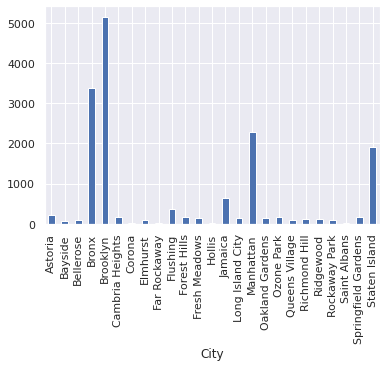

In [18]:
joined.groupby(['City'])['Force'].count().plot(kind='bar')
plt.xticks(rotation ='vertical')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bronx'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Manhattan'),
  Text(3, 0, 'Queens'),
  Text(4, 0, 'Staten Island')])

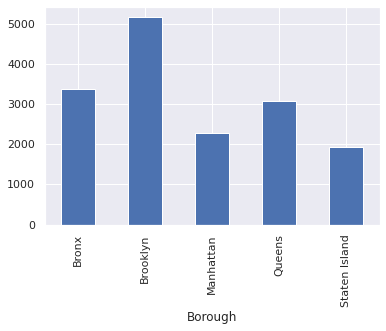

In [19]:
joined.groupby(['Borough'])['Force'].count().plot(kind='bar')
plt.xticks(rotation ='vertical')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Elementary'),
  Text(1, 0, 'High school'),
  Text(2, 0, 'Junior High-Intermediate-Middle'),
  Text(3, 0, 'K-12 all grades'),
  Text(4, 0, 'K-8'),
  Text(5, 0, 'Secondary School'),
  Text(6, 0, 'Ungraded')])

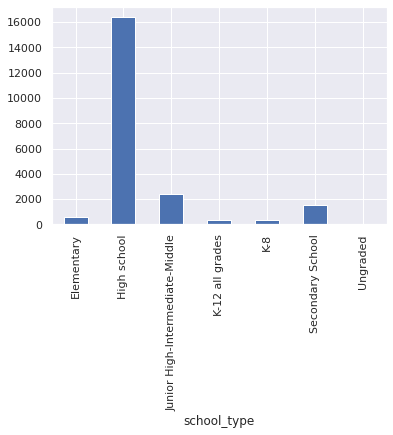

In [20]:
joined.groupby(['school_type'])['Force'].count().plot(kind='bar')
plt.xticks(rotation ='vertical')

In [21]:
force_city_cross = pd.crosstab(df['Intervention Type'], df['City'])
force_city_cross

City,Astoria,Bayside,Bellerose,Bronx,Brooklyn,Cambria Heights,Corona,Elmhurst,Far Rockaway,Flushing,...,Manhattan,Oakland Gardens,Ozone Park,Queens Village,Richmond Hill,Ridgewood,Rockaway Park,Saint Albans,Springfield Gardens,Staten Island
Intervention Type,,,,,,,,,,,,,,,,,,,,,
Arrested,43,21,4,440,545,26,1,22,4,78,...,363,42,34,17,23,18,10,5,10,182
Child in Crisis,99,4,1,670,663,47,8,36,2,57,...,579,29,50,7,15,48,17,7,28,202
Juvenile Report,27,18,3,550,440,8,1,7,2,63,...,398,29,12,14,9,12,17,0,7,210
Mitigated,40,21,89,1208,2926,71,6,21,2,108,...,603,22,51,27,47,28,37,11,94,1111
PINS / Warrant,0,1,0,13,19,2,0,0,0,5,...,7,0,1,0,3,0,0,0,0,21
PINS Warrant,0,0,0,4,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
Summons,12,7,4,437,430,12,1,6,3,53,...,310,21,18,20,21,21,17,1,16,126
mitigated,4,3,0,58,179,1,2,3,0,10,...,23,0,1,1,0,1,5,0,4,95


Text(0.5, 1.0, 'Intervention vs. City')

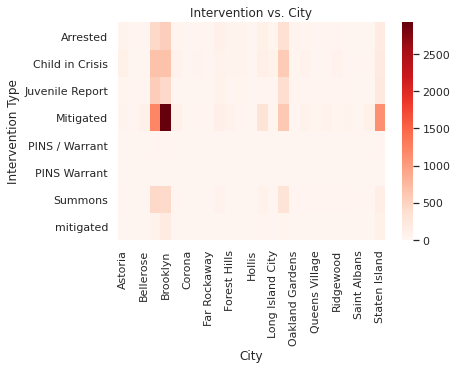

In [22]:
ax = sns.heatmap(force_city_cross, cmap="Reds")
ax.set_title("Intervention vs. City")

In [23]:
joined['Force'].unique()

array(['N', nan, 'Y'], dtype=object)

In [24]:
joined['Force'].unique()

array(['N', nan, 'Y'], dtype=object)

In [25]:
used_force = joined['Force'].value_counts()['Y']

In [26]:
force_city_cross = pd.crosstab(used_force, joined['City'])
force_city_cross

City,Astoria,Bayside,Bellerose,Bronx,Brooklyn,Cambria Heights,Corona,Elmhurst,Far Rockaway,Flushing,...,Manhattan,Oakland Gardens,Ozone Park,Queens Village,Richmond Hill,Ridgewood,Rockaway Park,Saint Albans,Springfield Gardens,Staten Island
row_0,,,,,,,,,,,,,,,,,,,,,
538,225,75,101,3380,5203,168,19,95,13,375,...,2284,143,167,86,118,128,103,24,159,1948


In [27]:
joined['City'].value_counts()

Brooklyn               5203
Bronx                  3380
Manhattan              2284
Staten Island          1948
Jamaica                 641
Flushing                375
Astoria                 225
Cambria Heights         168
Ozone Park              167
Forest Hills            166
Springfield Gardens     159
Long Island City        149
Oakland Gardens         143
Fresh Meadows           135
Ridgewood               128
Richmond Hill           118
Rockaway Park           103
Bellerose               101
Elmhurst                 95
Queens Village           86
Bayside                  75
Saint Albans             24
Corona                   19
Hollis                   16
Far Rockaway             13
Name: City, dtype: int64

In [28]:
joined.corr()

,Year,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Zip Code,Latitude,Longitude,Student Enrollment,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing)
Year,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.005374,-0.021133,-0.025093,0.045586,0.041721,0.032616,0.034236
Unnamed: 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Create correlation matrix
corr_matrix = joined.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
top = [column for column in upper.columns if any(upper[column] > 0.95)]
print(upper)

                             Year  Unnamed: 17  Unnamed: 18  Unnamed: 19  \
Year                          NaN          NaN          NaN          NaN   
Unnamed: 17                   NaN          NaN          NaN          NaN   
Unnamed: 18                   NaN          NaN          NaN          NaN   
Unnamed: 19                   NaN          NaN          NaN          NaN   
Unnamed: 20                   NaN          NaN          NaN          NaN   
Unnamed: 21                   NaN          NaN          NaN          NaN   
Unnamed: 22                   NaN          NaN          NaN          NaN   
Unnamed: 23                   NaN          NaN          NaN          NaN   
Unnamed: 24                   NaN          NaN          NaN          NaN   
Unnamed: 25                   NaN          NaN          NaN          NaN   
Unnamed: 26                   NaN          NaN          NaN          NaN   
Unnamed: 28                   NaN          NaN          NaN          NaN   
Unnamed: 29 

<ipython-input-29-20efed432833>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [30]:
folium_map = folium.Map()
folium_map

In [31]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords)
folium_map

In [32]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords, zoom_start=13)
folium_map

In [33]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords, zoom_start=13, tiles="OpenStreetMap")
folium_map

In [34]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords, zoom_start=13, tiles="Stamen Terrain")
folium_map

In [35]:
folium_hmap = folium.Map(location=ny_coords, zoom_start=10, tiles="OpenStreetMap")

In [36]:
my_zip = zip(joined['Latitude'].dropna(), joined['Longitude'].dropna())
list_of_my_zip = list(my_zip)
list_of_my_zip[0:15]

[(40.58231, -73.96747),
 (40.58231, -73.96747),
 (40.58231, -73.96747),
 (40.58231, -73.96747),
 (40.58231, -73.96747),
 (40.58231, -73.96747),
 (40.63263, -73.9178),
 (40.69696, -73.91082),
 (40.69696, -73.91082),
 (40.73552, -73.9876),
 (40.73552, -73.9876),
 (40.69696, -73.91082),
 (40.67851, -73.96207),
 (40.68893, -73.92108),
 (40.81825, -73.91974)]

In [37]:
hm_layer = HeatMap(list_of_my_zip,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.3,
                   radius=8,
                   blur=6, 
                 )

In [38]:
folium_hmap.add_child(hm_layer)
folium_hmap

In [39]:

lat_log_force_yes = joined.loc[ joined['Force']=='Y', ["Latitude","Longitude" ] ].dropna()
lat_log_force_no = joined.loc[ joined['Force']=='N', ["Latitude","Longitude" ] ].dropna()
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")
for i in range(215):
    marker = folium.CircleMarker(location=[lat_log_force_yes["Latitude"].iloc[i],lat_log_force_yes["Longitude"].iloc[i]],radius=5,color="red",fill=True)
    marker.add_to(folium_map)

for i in range(1000):
    marker = folium.CircleMarker(location=[lat_log_force_no["Latitude"].iloc[i],lat_log_force_no["Longitude"].iloc[i]],radius=5,color="blue",fill=True)
    marker.add_to(folium_map)    
    
folium_map

In [41]:
nypd_data = pd.read_csv('clean_data/NYPD_Complaint_Data_Historic.csv')
nypd_data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,932184137,01/01/2016,00:00:00,11/30/2019,22:00:00,34,12/14/2019,116,SEX CRIMES,177.0,...,M,NaN,40.851488,-73.935458,"(40.85148777400008, -73.93545796699993)",PATROL BORO MAN NORTH,NaN,<18,BLACK HISPANIC,F
1,524734897,01/01/2016,00:20:00,05/16/2017,16:00:00,67,11/18/2019,112,THEFT-FRAUD,739.0,...,NaN,NaN,40.645922,-73.950965,"(40.64592203900003, -73.95096460799994)",PATROL BORO BKLYN SOUTH,NaN,25-44,BLACK,F
2,425311840,01/01/2016,00:00:00,11/13/2019,06:00:00,120,11/13/2019,126,MISCELLANEOUS PENAL LAW,697.0,...,M,NaN,40.644726,-74.077483,"(40.64472613100002, -74.07748315899995)",PATROL BORO STATEN ISLAND,NaN,UNKNOWN,UNKNOWN,E
3,211927249,01/01/2016,19:00:00,12/31/2016,19:00:00,46,11/18/2019,233,SEX CRIMES,175.0,...,NaN,NaN,40.853960,-73.900121,"(40.85396027400003, -73.90012087499997)",PATROL BORO BRONX,NaN,<18,BLACK HISPANIC,F
4,934187944,01/01/2016,12:00:00,11/01/2018,12:00:00,112,10/30/2019,233,SEX CRIMES,175.0,...,U,NaN,40.722364,-73.851474,"(40.72236368700004, -73.85147389399998)",PATROL BORO QUEENS NORTH,NaN,<18,WHITE HISPANIC,F


In [42]:
nypd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CMPLNT_NUM         2345 non-null   int64  
 1   CMPLNT_FR_DT       2345 non-null   object 
 2   CMPLNT_FR_TM       2345 non-null   object 
 3   CMPLNT_TO_DT       1957 non-null   object 
 4   CMPLNT_TO_TM       1956 non-null   object 
 5   ADDR_PCT_CD        2345 non-null   int64  
 6   RPT_DT             2345 non-null   object 
 7   KY_CD              2345 non-null   int64  
 8   OFNS_DESC          2345 non-null   object 
 9   PD_CD              2344 non-null   float64
 10  PD_DESC            2344 non-null   object 
 11  CRM_ATPT_CPTD_CD   2345 non-null   object 
 12  LAW_CAT_CD         2345 non-null   object 
 13  BORO_NM            2344 non-null   object 
 14  LOC_OF_OCCUR_DESC  1866 non-null   object 
 15  PREM_TYP_DESC      2342 non-null   object 
 16  JURIS_DESC         2345 

In [44]:
my_zip2 = zip(nypd_data['Latitude'].dropna(), nypd_data['Longitude'].dropna())
list_of_my_zip2 = list(my_zip2)
list_of_my_zip2[0:15]

[(40.85148777400008, -73.93545796699993),
 (40.64592203900003, -73.95096460799994),
 (40.64472613100002, -74.07748315899995),
 (40.85396027400003, -73.90012087499997),
 (40.72236368700004, -73.85147389399998),
 (40.816391847000034, -73.89529641399997),
 (40.72655401900005, -73.98782842699995),
 (40.83732351100008, -73.91983075699994),
 (40.688872153000034, -73.94452903199993),
 (40.83732351100008, -73.91983075699994),
 (40.75119227300007, -73.97835693099995),
 (40.81662432900004, -73.88856544799995),
 (40.85396027400003, -73.90012087499997),
 (40.576157300000034, -73.97598379999994),
 (40.67458330800008, -73.93022154099998)]

In [46]:
hm_layer2 = HeatMap(list_of_my_zip2,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.3,
                   radius=8,
                   blur=6, 
                 )

In [47]:
folium_hmap.add_child(hm_layer2)
folium_hmap

In [48]:
joined.to_csv('data/map_data.csv', encoding='utf-8')